<a href="https://colab.research.google.com/github/tavishijain3/student-fitness-tracker-dataset/blob/main/Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TAVISHI JAIN (21BDS0113)
# **Exploratory Data Analysis (EDA) of Fitness Data**
### 1. Mount Google Drive


In [1]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Step 1:** Load the Dataset

In [2]:
import pandas as pd

# Specify the file path in your Google Drive
file_path = '/content/drive/MyDrive/fitness_recommender_dataset.csv'

# Load the file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

  Student_ID  Age  Gender  Height_cm  Weight_kg Fitness_Goal  Activity_Level  \
0         S1   24    Male        190         54    Endurance          Active   
1         S2   21    Male        156         54  Flexibility  Lightly Active   
2         S3   25    Male        153         63    Endurance  Lightly Active   
3         S4   22   Other        160         61  Muscle Gain          Active   
4         S5   24  Female        178         65  Muscle Gain          Active   

  Preferred_Workout_Time Dietary_Preference  Daily_Step_Count  \
0                Morning         Vegetarian             13233   
1              Afternoon              Vegan              4828   
2                Evening     Non-Vegetarian             13300   
3                Evening         Vegetarian             12130   
4                Evening     Non-Vegetarian              7805   

   Resting_Heart_Rate  Academic_Schedule Preferred_Exercise_Type  \
0                  86                  9                    

## 2. Import Libraries

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Load Dataset

In [4]:
# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/fitness_recommender_dataset.csv'  # Update this path if needed
df = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
print("Dataset Preview:")
print(df.head())

Dataset Preview:
  Student_ID  Age  Gender  Height_cm  Weight_kg Fitness_Goal  Activity_Level  \
0         S1   24    Male        190         54    Endurance          Active   
1         S2   21    Male        156         54  Flexibility  Lightly Active   
2         S3   25    Male        153         63    Endurance  Lightly Active   
3         S4   22   Other        160         61  Muscle Gain          Active   
4         S5   24  Female        178         65  Muscle Gain          Active   

  Preferred_Workout_Time Dietary_Preference  Daily_Step_Count  \
0                Morning         Vegetarian             13233   
1              Afternoon              Vegan              4828   
2                Evening     Non-Vegetarian             13300   
3                Evening         Vegetarian             12130   
4                Evening     Non-Vegetarian              7805   

   Resting_Heart_Rate  Academic_Schedule Preferred_Exercise_Type  \
0                  86                  9   

## 4. Handle Missing Values

In [5]:
# Replace missing values in 'Chronic_Condition' with 'None'
df['Chronic_Condition'] = df['Chronic_Condition'].fillna('None')

# Verify if there are any remaining missing values
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
Student_ID                  0
Age                         0
Gender                      0
Height_cm                   0
Weight_kg                   0
Fitness_Goal                0
Activity_Level              0
Preferred_Workout_Time      0
Dietary_Preference          0
Daily_Step_Count            0
Resting_Heart_Rate          0
Academic_Schedule           0
Preferred_Exercise_Type     0
Weekly_Workout_Frequency    0
Chronic_Condition           0
dtype: int64


## 5. Standardize Text Columns

In [6]:
# Convert text-based columns to lowercase for consistency
text_columns = [
    'Gender', 'Dietary_Preference', 'Preferred_Exercise_Type',
    'Fitness_Goal', 'Activity_Level', 'Preferred_Workout_Time'
]
for col in text_columns:
    df[col] = df[col].str.lower()

# Preview the standardized dataset
print("\nStandardized Dataset Preview:")
print(df.head())


Standardized Dataset Preview:
  Student_ID  Age  Gender  Height_cm  Weight_kg Fitness_Goal  Activity_Level  \
0         S1   24    male        190         54    endurance          active   
1         S2   21    male        156         54  flexibility  lightly active   
2         S3   25    male        153         63    endurance  lightly active   
3         S4   22   other        160         61  muscle gain          active   
4         S5   24  female        178         65  muscle gain          active   

  Preferred_Workout_Time Dietary_Preference  Daily_Step_Count  \
0                morning         vegetarian             13233   
1              afternoon              vegan              4828   
2                evening     non-vegetarian             13300   
3                evening         vegetarian             12130   
4                evening     non-vegetarian              7805   

   Resting_Heart_Rate  Academic_Schedule Preferred_Exercise_Type  \
0                  86        

## 6. Handle Duplicates

In [7]:
# Drop duplicate rows, if any
df = df.drop_duplicates()

# Verify that duplicates are removed
print(f"\nNumber of Duplicate Rows After Removal: {df.duplicated().sum()}")


Number of Duplicate Rows After Removal: 0


## 7. Ensure Correct Data Types

In [8]:
# Convert numerical columns to the correct data types
numerical_columns = [
    'Age', 'Height_cm', 'Weight_kg', 'Daily_Step_Count',
    'Resting_Heart_Rate', 'Academic_Schedule', 'Weekly_Workout_Frequency'
]
for col in numerical_columns:
    df[col] = df[col].astype(int)

# Verify data types
print("\nUpdated Data Types:")
print(df.dtypes)


Updated Data Types:
Student_ID                  object
Age                          int64
Gender                      object
Height_cm                    int64
Weight_kg                    int64
Fitness_Goal                object
Activity_Level              object
Preferred_Workout_Time      object
Dietary_Preference          object
Daily_Step_Count             int64
Resting_Heart_Rate           int64
Academic_Schedule            int64
Preferred_Exercise_Type     object
Weekly_Workout_Frequency     int64
Chronic_Condition           object
dtype: object


## 8. Add BMI Column

In [9]:
# Calculate BMI and add it as a new column
df['BMI'] = df['Weight_kg'] / ((df['Height_cm'] / 100) ** 2)

# Preview the dataset with the new BMI column
print("\nDataset with BMI Column:")
print(df[['Height_cm', 'Weight_kg', 'BMI']].head())


Dataset with BMI Column:
   Height_cm  Weight_kg        BMI
0        190         54  14.958449
1        156         54  22.189349
2        153         63  26.912726
3        160         61  23.828125
4        178         65  20.515086


## 9. Save the Cleaned Dataset

In [10]:
# Save the cleaned dataset to Google Drive
output_path = '/content/drive/MyDrive/cleaned_fitness_dataset.csv'
df.to_csv(output_path, index=False)

print(f"\nCleaned dataset saved to: {output_path}")


Cleaned dataset saved to: /content/drive/MyDrive/cleaned_fitness_dataset.csv


## 10. Visualizations
### 10.1 Boxplot of Numerical Features

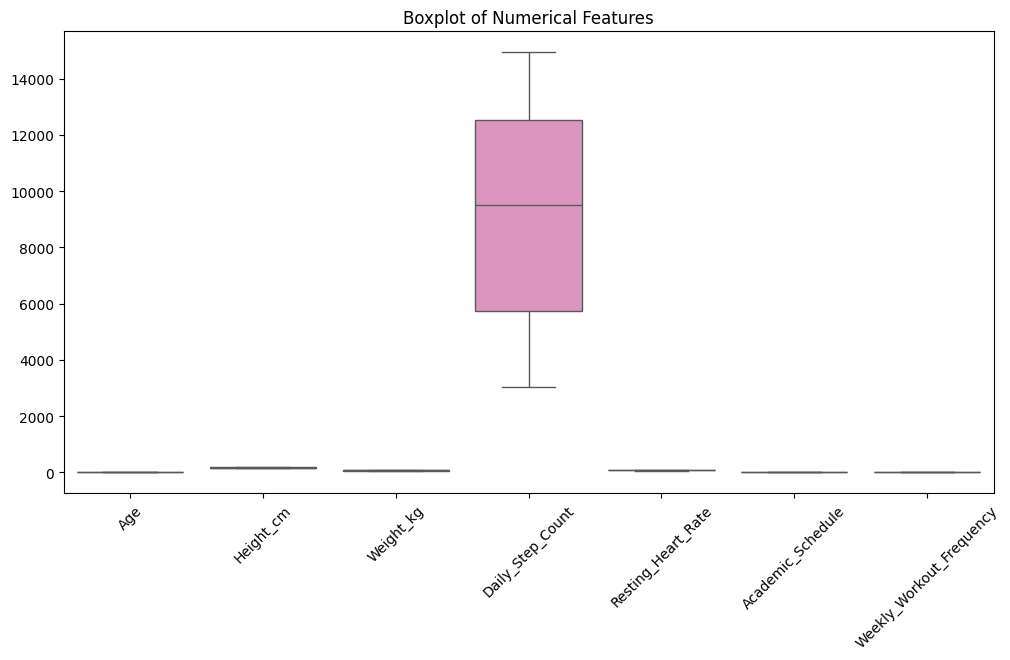

In [11]:
# Boxplot to check for outliers in numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns], palette="Set2")
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Features')
plt.show()

### 10.2 Distribution of BMI

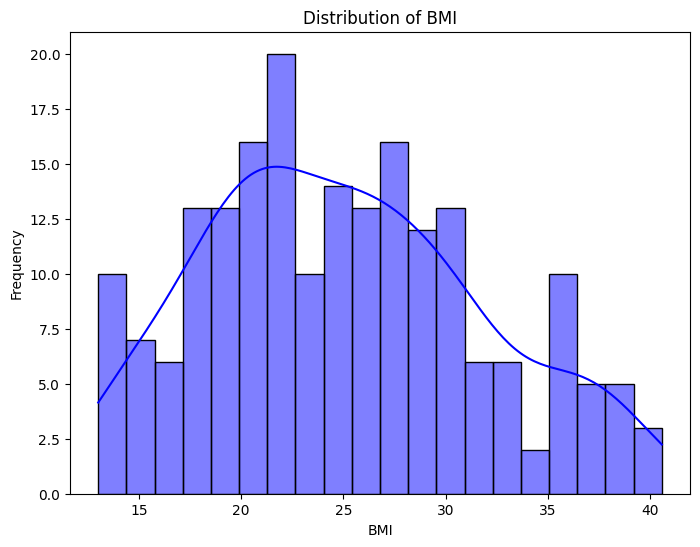

In [12]:
# Histogram to show the distribution of BMI
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], kde=True, bins=20, color='blue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

### 10.3 Average Daily Steps by Fitness Goal

<ipython-input-13-7d3778002734>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Fitness_Goal', y='Daily_Step_Count', palette="Set3", ci=None)
<ipython-input-13-7d3778002734>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Fitness_Goal', y='Daily_Step_Count', palette="Set3", ci=None)


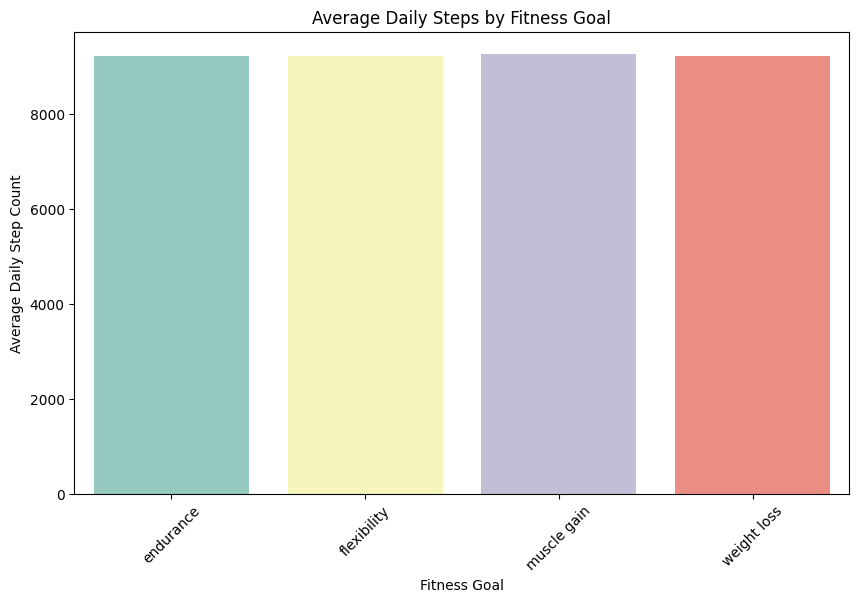

In [13]:
# Bar chart showing average daily steps by fitness goal
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Fitness_Goal', y='Daily_Step_Count', palette="Set3", ci=None)
plt.title('Average Daily Steps by Fitness Goal')
plt.xlabel('Fitness Goal')
plt.ylabel('Average Daily Step Count')
plt.xticks(rotation=45)
plt.show()

### 10.4 Weekly Workout Frequency by Gender

<ipython-input-14-ab49fecbfc2a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Weekly_Workout_Frequency', palette="Set1")


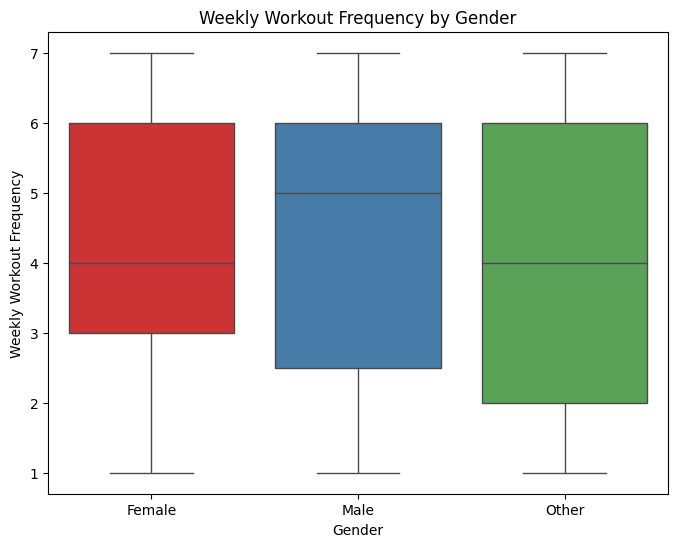

In [14]:
# Boxplot of weekly workout frequency categorized by gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Weekly_Workout_Frequency', palette="Set1")
plt.title('Weekly Workout Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Weekly Workout Frequency')
plt.xticks(ticks=[0, 1, 2], labels=['Female', 'Male', 'Other'])
plt.show()

### 10.5 Activity Level Distribution

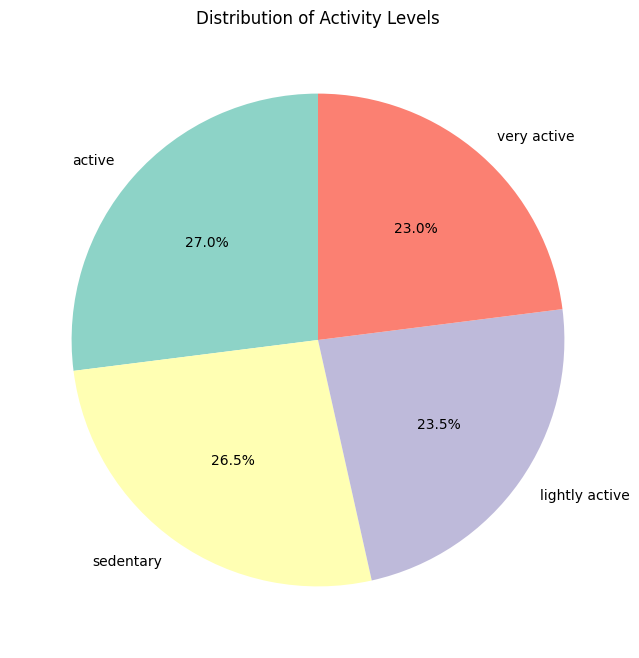

In [15]:
# Pie chart to show the distribution of activity levels
plt.figure(figsize=(8, 8))
activity_counts = df['Activity_Level'].value_counts()
activity_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Distribution of Activity Levels')
plt.ylabel('')  # Remove the default y-label
plt.show()

### 10.6 Preferred Workout Time

<ipython-input-16-1a7de466a423>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Preferred_Workout_Time', palette="Set2", order=df['Preferred_Workout_Time'].value_counts().index)


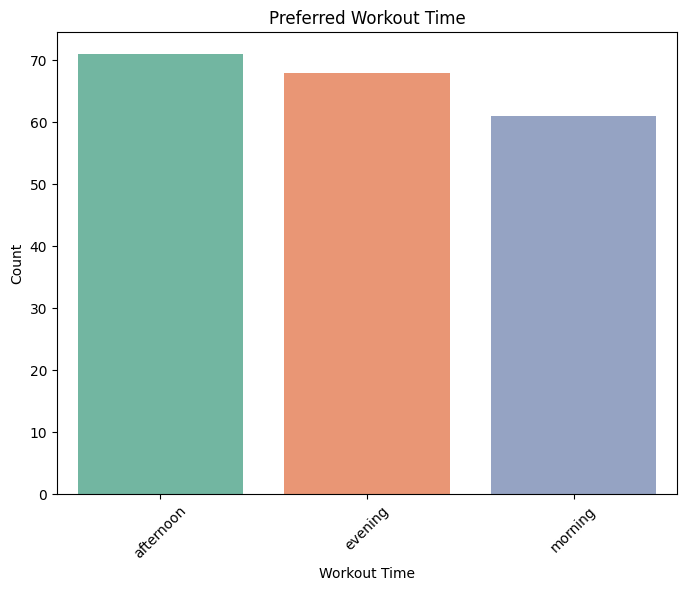

In [16]:
# Bar chart to show the preferred workout times
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Preferred_Workout_Time', palette="Set2", order=df['Preferred_Workout_Time'].value_counts().index)
plt.title('Preferred Workout Time')
plt.xlabel('Workout Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 10.7 Correlation Heatmap

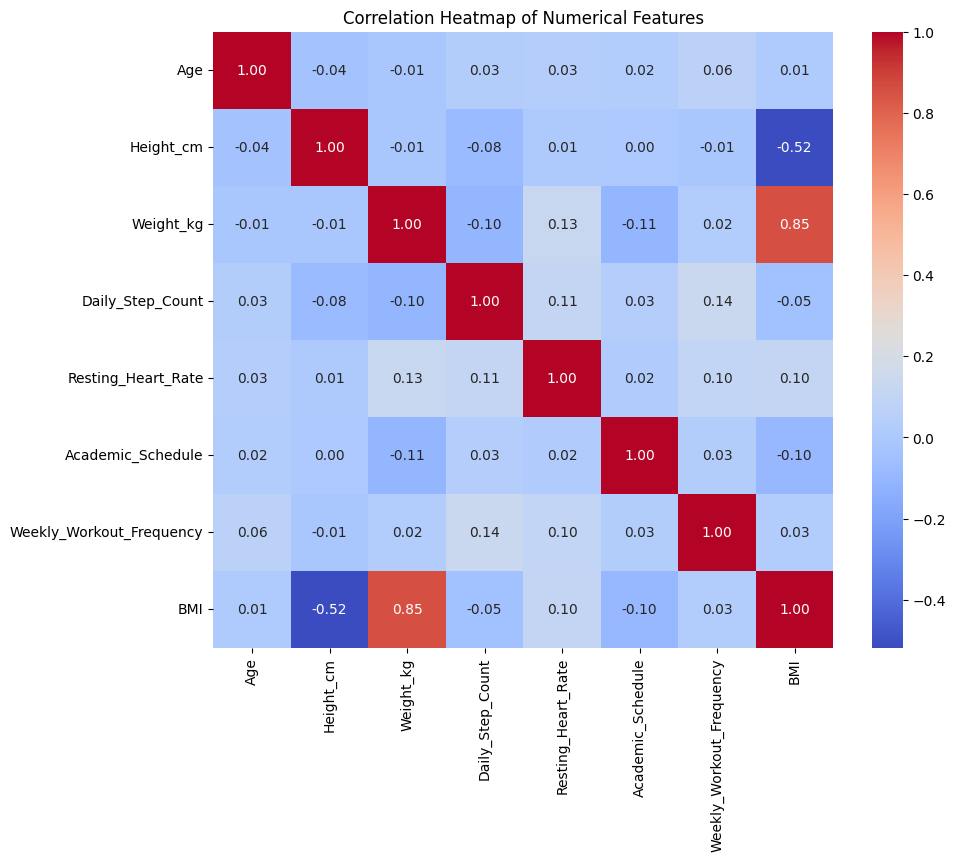

In [17]:
# Heatmap to show correlations between numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns + ['BMI']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### 10.8 Steps vs Academic Schedule

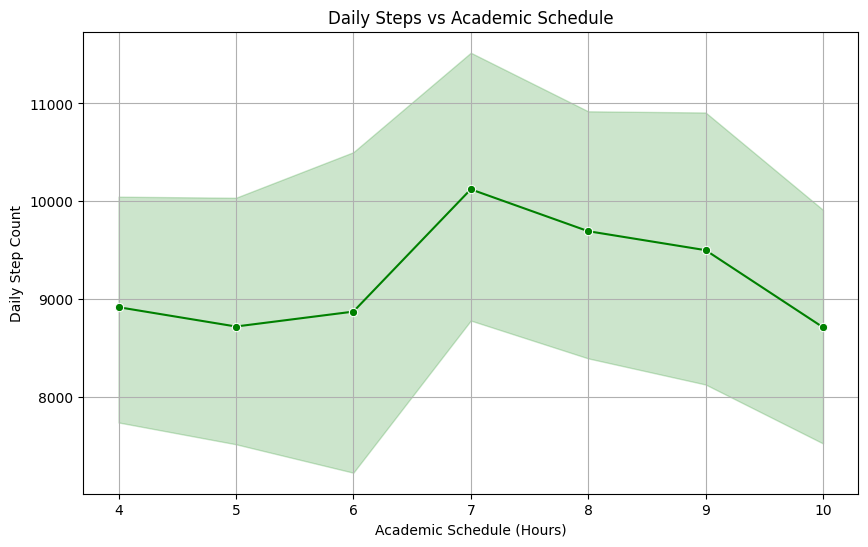

In [18]:
# Line plot to show the relationship between daily steps and academic schedule
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Academic_Schedule', y='Daily_Step_Count', marker='o', color='green')
plt.title('Daily Steps vs Academic Schedule')
plt.xlabel('Academic Schedule (Hours)')
plt.ylabel('Daily Step Count')
plt.grid(True)
plt.show()

### 10.9 Dietary Preference Breakdown

<ipython-input-19-64e85b74c71b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Dietary_Preference', palette="Set1", order=df['Dietary_Preference'].value_counts().index)


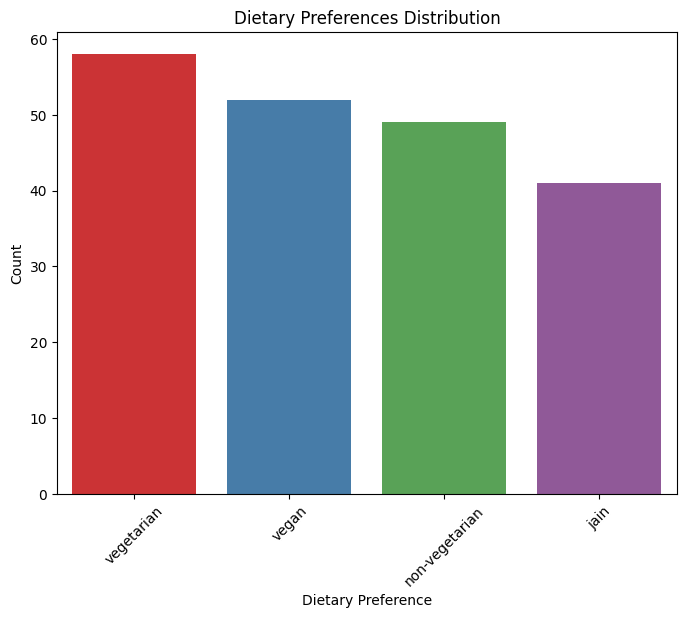

In [19]:
# Bar chart to show the count of each dietary preference
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Dietary_Preference', palette="Set1", order=df['Dietary_Preference'].value_counts().index)
plt.title('Dietary Preferences Distribution')
plt.xlabel('Dietary Preference')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()